# Sistemas Discretos y Caos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = (14, 10)

In [2]:
#Funcion
e = 0.001
def f(r, x, e):
    return 4*r*x*(1.0-x) + e

def Iterate(n,r,x,e):
    values = [x]
    for i in range(n):
        x = f(r,x,e)
        values.append(x)
    return values
    
def fn(n,r,x,e):
    if n == 1 :
        return f(r,x,e)
    else :
        return fn(n-1,r,f(r,x,e),e)

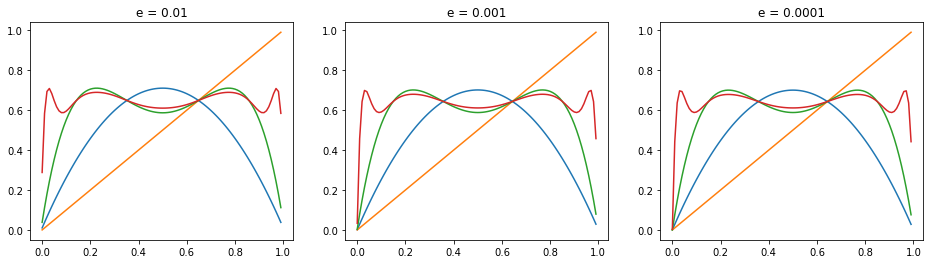

In [3]:
n = 400
r = 0.7
x0 = 0.5

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fp = np.arange(0.0,1.0,0.01)

axes[0].set_title("e = 0.01")
e = 0.01
x = Iterate(n,r,x0,e)
axes[0].plot(fp,f(r,fp,e))
axes[0].plot(fp,fp)
axes[0].plot(fp,fn(2,r,fp,e))
axes[0].plot(fp,fn(4,r,fp,e))

axes[1].set_title("e = 0.001")
e = 0.001
x = Iterate(n,r,x0,e)
axes[1].plot(fp,f(r,fp,e))
axes[1].plot(fp,fp)
axes[1].plot(fp,fn(2,r,fp,e))
axes[1].plot(fp,fn(4,r,fp,e))

axes[2].set_title("e = 0.0001");
e = 0.0001
x = Iterate(n,r,x0,e)
axes[2].plot(fp,f(r,fp,e))
axes[2].plot(fp,fp)
axes[2].plot(fp,fn(2,r,fp,e))
axes[2].plot(fp,fn(4,r,fp,e))

## Gráfica del atractor

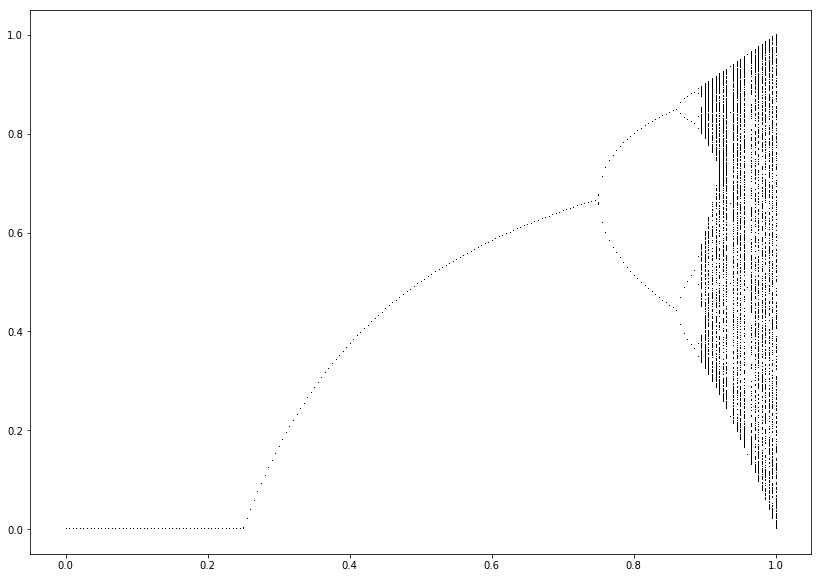

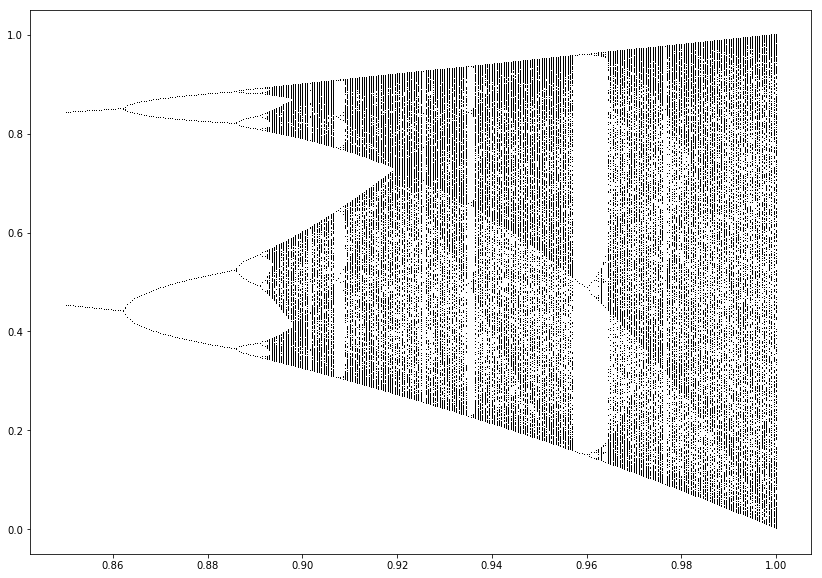

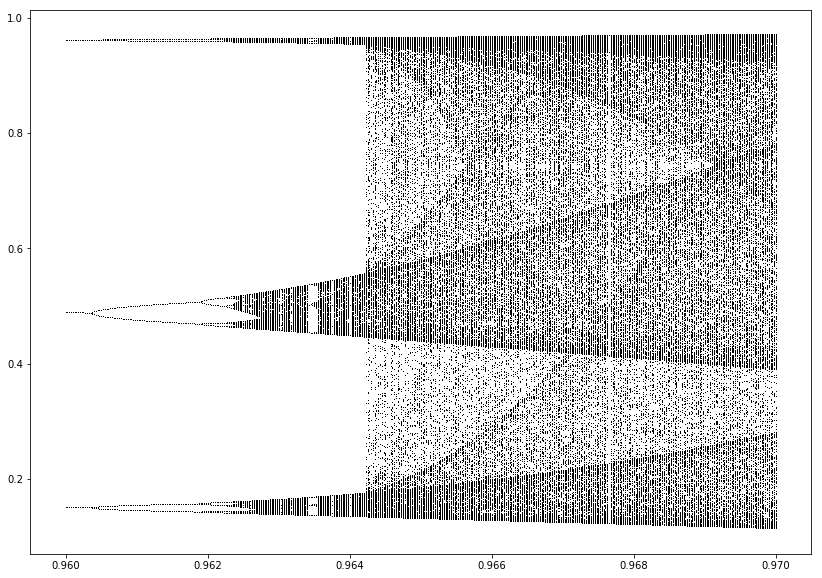

In [4]:
def f_T(x, r):
    return 4*r*x*(1.-x)

def Iterate(g, x0, N, args=()):
    for i in range(N):
        x0 = g(x0, *args)
    return x0

def IterateList(g, x0, N, args=()):
    xs = [x0]
    for i in range(N-1):
        x0 = g(x0, *args)
        xs.append(x0)
    return xs


def grafica_atractor(g, x0, a, b, rango, showPlot=True):
    etaMatrix = []
    xMatrix = []
    for i in rango:
        etaMatrix.append([i]*b)
        xMatrix.append(IterateList(g, Iterate(g, x0, a, (i,)),b, (i,)))
    plt.plot(etaMatrix, xMatrix, 'k,')
    if showPlot: 
        plt.show()

l1 = np.arange(0., 1.00001, 0.005)
l2 = np.arange(0.85, 1.00001, 0.0005)
l3 = np.arange(0.96, 0.97, 0.000025)
t = 0.1
n_it = 500

grafica_atractor(f_T, t, n_it, n_it, l1)
grafica_atractor(f_T, t, n_it, n_it, l2)
grafica_atractor(f_T, t, n_it, n_it, l3)

# Exponente de Lyapunov

/home/gerson/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


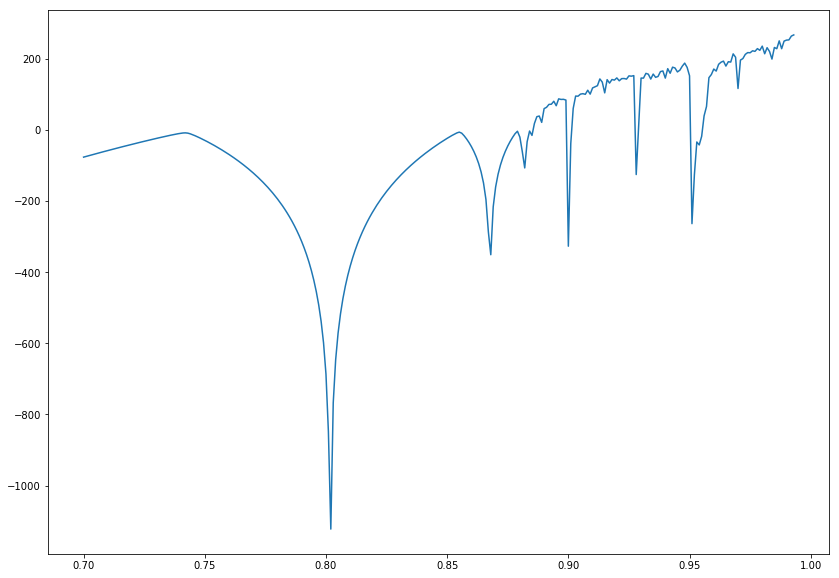

In [7]:
def Lyapunov(n,r,x):
    sum = 0.0
    x = 0.51
    e = 0.01
    for i in range(n) :
        sum = sum + np.log(np.abs(4*r*(1 - 2*x)))
        x = f(r,x,e)
    return np.mean(sum)

r = np.arange(0.7, 1.0, 0.001)
lambdas = []

for u in r : 
    lambdas.append(Lyapunov(n,u,x))
plt.plot(r,lambdas)
plt.show()